<a href="https://colab.research.google.com/github/MSM-M4rcelo/AN-LISE_EXPLORAT-RIA_DIO/blob/main/An%C3%A1lise_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
#Python para análise de dados.

In [146]:
#mportando as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt


In [147]:
#importando as base de dados.

df1 = pd.read_excel("/content/drive/MyDrive/Data science/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Data science/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Data science/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Data science/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Data science/Salvador.xlsx")

In [148]:
#Concatenando todas as planilhas em uma só.

df = pd.concat([df1,df2,df3,df4,df5])

In [149]:
#visualizando os 10 primeirod itens da planilha.

df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [150]:
#visualizando os ultimos dados

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [151]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
88,Aracaju,2018-01-01,190.67,1521,5
106,Recife,2019-01-01,30.46,982,3
13,Recife,2019-02-12,15.33,983,5
123,Natal,2019-01-02,127.45,1036,3
15,Natal,2018-02-01,432.00,854,3


In [152]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [153]:
#Alterando o tipo de dado da coluna LojaID

df["LojaID"] = df["LojaID"].astype("object")

In [154]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

#TRATANDO DADOS AUSENTES#

In [155]:
#consutando linhas vazias
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

### COMO NÃO HOUVE DADOS AUSENTES NÃO SERÁ NECESSÁRIO O TRATAMENTO MAS, NEM SEMPRE É ASSIM POR ISSO É IMPORTANTE O TRATAMENTO DOS DADOS AUSÊNTES PARA UMA ANÁLISE MAIS PRECISA.#

PARA TRATAR OS VALORES AUSENTES DEVE-SE:

Substituindo os valores nulos por zero.

Apagar as linhas com valores nulos.

Apagar as linhas com valores nulos com base apenas em 1 coluna.

Remover linhas que estejam com valores faltantes em todas as colunas.

In [156]:
#Criando a coluna de receita

df["Receita"] = df["Vendas"]*(df["Qtde"])

In [157]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [158]:
#verificando a Receita máxima
df['Receita'].max()

3544.0

In [159]:
#Verificando a Receita mínima
df['Receita'].min()

3.34

#MAIORES RECEITAS#

In [161]:
#nlargest verificando o Número decrescente do maior para a menor
df.nlargest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


#MENORES RECEITAS#

In [ ]:
#nsmallest verificandi o número crescente do menor para o maior
df.nsmallest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


#CIDADES COM AS MAIORES RECEITAS#

In [162]:
#agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

#CIDADE COM MENORES RECIETAS#

In [ ]:
#agrupamento por cidade
df.groupby('Cidade')['Receita'].min()

Cidade
Aracaju       3.34
Fortaleza    10.68
Natal         4.57
Recife        4.01
Salvador      4.57
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#RECEITA ANAUAL#

In [ ]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

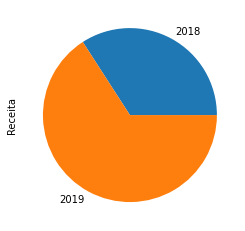

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
df['Ano_de_venda'] = df['Data'].dt.year

In [ ]:
df.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
120,Natal,2019-01-02,140.17,1036,2,280.34
88,Natal,2019-01-02,31.20,1036,1,31.20
98,Fortaleza,2019-01-01,15.00,1005,2,30.00
98,Natal,2019-01-02,231.76,1036,3,695.28


In [163]:
#Extraindo o mês e o dia das vendas
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_de_venda,Mes_venda,Dia_venda
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,2018,1,1
18,Recife,2019-01-01,49.40,980,5,247.00,2019,1,1
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,2018,1,1
77,Recife,2019-01-01,102.82,981,6,616.92,2019,1,1


Definido dia, mês, e ano das vendas é possível mensurar os lucros e perdas em qualquer período do intervalo de tempo.

In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_de_venda,Mes_venda,Dia_venda
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2
118,Salvador,2019-03-02,92.21,1035,2,184.42,2019,3,2
136,Fortaleza,2019-03-02,39.09,982,4,156.36,2019,3,2
124,Fortaleza,2019-03-02,47.98,983,7,335.86,2019,3,2


#LOJA QUE MAIS VENDEU#

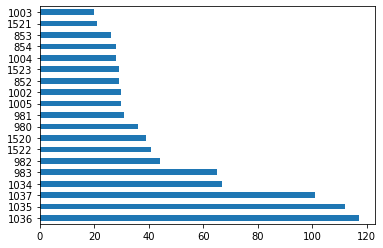

In [ ]:
df["LojaID"].value_counts().plot.barh();

#CIDADE QUE MAIS VENDEU#

In [ ]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

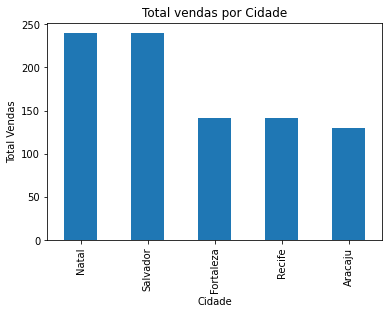

In [ ]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

#TOTAL DE PRODUTOS VENDIDOS POR MÊS#

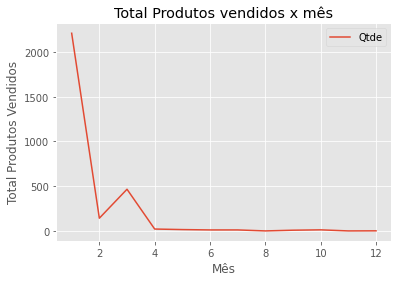

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

#MÊS COM MAIS VENDAS#

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

#VENDAS DO ANO DE 2018

In [134]:
df_2018 = df[df["Ano_de_venda"] == 2018]
df_2018.groupby(df_2018["Mes_venda"])["Qtde"].sum()

Mes_venda
1     667
2      16
3       7
4      11
5      17
6      13
7      13
8       2
9      10
10     14
11      2
12      3
Name: Qtde, dtype: int64

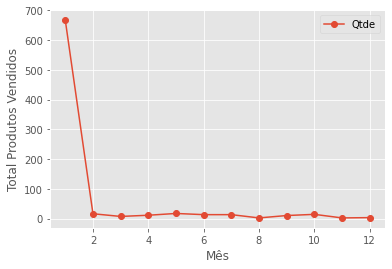

In [135]:
df_2018.groupby(df_2018["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

#VENDAS DO ANO DE 2019#

In [132]:

df_2019 = df[df['Ano_de_venda'] == 2019]
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum()


Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

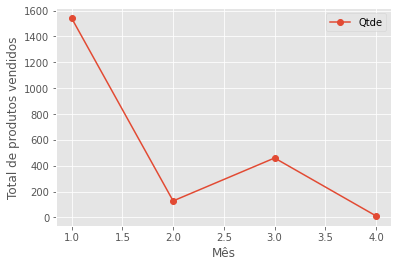

In [133]:
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

#QUANTIDADE DE VENDAS POR DIA#

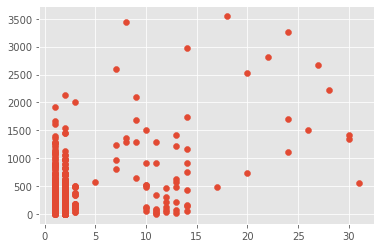

In [ ]:
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);